<a href="https://colab.research.google.com/github/goelnikhils-lgtm/languagemodels/blob/main/Handlingclassimbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#example class to handle class imbalance by looking into various samplinb techniques like SMOTE (Minority class over sampling), Stratified Sampling
#why do we use F1 as metric to evaluate class imbalance as Precision = tp/tp+fp and Recall = tp/tp+fn
#Credit - https://www.geeksforgeeks.org/machine-learning/handling-imbalanced-data-for-classification/

In [ ]:
#need to handling class imbalance as -> machine learning models get biased to majority class and that hampers generalization and leads to overfitting
#overfitting should be avoided and addressed

In [ ]:
#let's code

#case for RandomSampler and balancing the majority and miniority classes
import numpy as np
from sklearn.datasets import  make_classification
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

#create a class imbalanced dataset
X,y = make_classification(n_classes = 2 , class_sep = 2 , weights = [0.1,0.9],
                          n_informative = 3 , n_redundant = 1, flip_y=0,
                          n_features = 20,n_clusters_per_class = 1 ,
                          n_samples = 1000, random_state = 42)
print("Original Class Distribution:", Counter(y))

#oversampling using RandomSampler
oversample = RandomOverSampler(sampling_strategy = 'minority')
x_over, y_over = oversample.fit_resample(X,y)
print("Random Oversampling Class Distribution:", Counter(y_over))

#undersampling using RandomSampler
undersample = RandomUnderSampler(sampling_strategy = 'majority')
x_under, y_under = undersample.fit_resample(X,y)
#yields a balanced dataset of classes --------------------------------->
print("Random Undersampling Class Distribution:", Counter(y_under))

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.metrics import accuracy_score , classification_report


#create a class imbalanced dataset
X,y = make_classification(n_classes = 2 , class_sep = 2 , weights = [0.1,0.9],
                          n_informative = 3 , n_redundant = 1, flip_y=0,
                          n_features = 20,n_clusters_per_class = 1 ,
                          n_samples = 1000, random_state = 42)
#split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

base_classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)

#create a Balanaced Bagging Classifier
balanced_bagging_classifier = BalancedBaggingClassifier(base_classifier,
                                                        n_estimators = 10,
                                                        sampling_strategy = 'auto',
                                                        replacement = False,
                                                        random_state = 42)

#fit the model
balanced_bagging_classifier.fit(X_train, y_train)

#make predictions
y_pred = balanced_bagging_classifier.predict(X_test)

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n",classification_report(y_test, y_pred))



In [ ]:
#SMOTE
#SMOTE uses k-NN for synthetically oversampling the minority class

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

#create an imbalanced dataset
#create a class imbalanced dataset
X,y = make_classification(n_classes = 2 , class_sep = 2 , weights = [0.1,0.9],
                          n_informative = 3 , n_redundant = 1, flip_y=0,
                          n_features = 20,n_clusters_per_class = 1 ,
                          n_samples = 1000, random_state = 42)
#split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

#display class distribution before SMOTE
print("Original Class Distribution before SMOTE:", Counter(y_train))

#apply SMOTE to oversample minority class
smote = SMOTE(sampling_strategy = 'auto', random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#display class distribution after SMOTE
print("Class Distribution after SMOTE:", Counter(y_train_smote))



In [ ]:
#Threshold Moving to handle class imbalance

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , roc_auc_score

#create an imbalance dataset
X,y = make_classification(n_classes = 2 , class_sep = 2 , weights = [0.1,0.9],
                          n_informative = 3 , n_redundant = 1, flip_y=0,
                          n_features = 20,n_clusters_per_class = 1 ,
                          n_samples = 1000, random_state = 42)
#split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

#train a classification model (Random Forest as an example)
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

#predit the probabilities
y_pred_proba = model.predict_proba(X_test)[:,1]

#define a threshold for classification
threshold = 0.5

#adjust the threshold based on your criteria
while threshold >=0:
    y_pred = (y_pred_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    print(f"Threshold:{threshold:.2f} - F1 Score:{f1:.4f}")
    threshold -= 0.02

In [ ]:
#FE - Correlation with dependent , RFE ...
#RFE is leveraging models to determine which set of features are most important - in our case in MMM models we used Lasso to do RFE and then used the features in Ridge Regression
#Rationale for using RFE is we need to have better accuracy of models with righ features else you have 200 data points
#another technique that we used for FE is Correlation between two Covariates and also tested correlation between depdendent and independent variables
#Regression is used to model a linear relationship between dependent and independent
#Sales is time series data and data points are time series data
#glm - - diff is constrained - UB and LB and then use LGBFS to get to tehe coeff
#PYMC3 - Hirearchial - is used when you have National Level Spends and you want to measure the impact of that on DMA level and that can't exceed a certain limit
#so that is where the usage comes of these models
#TTFN are CF .... and are ID based .... and hence to handle cold start (when user or item is new)
#the way to handle is map these new users and items to a bucket and that solves - Real Time Recomm Models
#Built Next Best Action Recommendation Engine leveraging Two Tower Neural Networks, resulting to 20% uptick in revenue for the Retail and Banking customer
#Retrieval Model was batch - generate embeddings and store them in VDB and Index - using FAISS - Bi Encoder
#Ranking is online inference - where you rank based on user features
#Niche of model is - leveraging customer sequence , comments as ranker.... and we use cross feature interactions  to caluate nuances of item and user interaction
#Demand Sensing and Forecasting for a CPG Brand - Soap Category . Signals used were - relatively stable category ....
#DF - batch base for every month we do
#DS - Orders data (demand) -> Dependent is Demand/ Orders -> : CPG on Amazon
#1)Price , Trade Data (0-2% , 2-5% ,>5%) , Marketing Promo(run a campain y/n) . Comp Price, Comp offer. Positive . Negative Sentiments on the product (1/0)
#2)Tertiray Sales data (POS sales data from Amazon)
#3)Inventory data (supply)
#4)Retail inflation
#5)Seasonality , Holidays , Trends , Cyclicity is key part ... you take these things out .... detrend , deseasonlize the time series , holidays etc...., Summers etc..
#Fourier Transform for cyclicity
#price impact as leading indicators
#holidays
#seasonality - wow seasonality calc - calculated separately ... trend calculated seprately and to make time series stationry we use differencing
#6)XGBoost Regression Model - why ? - accuracy - additive model
#7)Autocorrelartion - acf and pacf plot ....
#took last two years data for forecasting
#time window split for CV of model
#predicted demand T+7 and T+15 to align to manufacturing cycle
#models were refreshed evey week as planning cycle for fortnightly
#amazon data streams were available on daily basis
#metrics is RMSE , MAPE
#exponential smoothing to handle seasonality and trends
#we used XGBoost as it was we wanted to have more accuracy .... we compared various methods . used stats - holtwinters etc...
#Exogenous variables .... and hence XGBoost

In [ ]:
#bootstrapping for CI for Classification model
#boot strapping with replacement
#boot strapping is used to estimate true value (mean , SD or Variance) of a population parameter

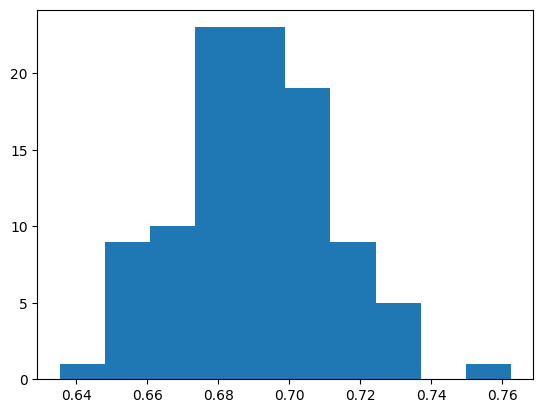

Confidence Interval 95.0 confidence interval 65.5% and 72.9% 


In [ ]:
#full example of CI
import numpy as np
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

#load dataset
data = read_csv('/content/sample_data/pima-indians-diabetes.csv', header=None)
values = data.values
#configure bootstrap
n_iterations = 100
n_size = int(len(data) * 0.50)
#run bootstrap
stats = list()
for i in range(n_iterations):
  train = resample(values, n_samples=n_size)
  test = np.array([x for x in values if x.tolist() not in train.tolist()])
  #fit model #running classifier 100 times
  model = DecisionTreeClassifier()
  #train the model
  model.fit(train[:,:-1], train[:,-1])
  #evaluate model
  predictions = model.predict(test[:,:-1])
  #statistics of interest for CI is model accuracy score
  score = accuracy_score(test[:,-1], predictions)
  #print(score)
  stats.append(score)
#plot score
pyplot.hist(stats)
pyplot.show()
#calc confidence intervals
alpha = 0.95
p = ((1-alpha)/2) * 100
lower = max(0.0, np.percentile(stats, p))
p = (alpha + (1-alpha)/2) * 100
upper = min(1.0, np.percentile(stats, p))
#95% confidence that model predicions/classification lie in 65% to 72.2%
print("Confidence Interval %.1f confidence interval %.1f%% and %.1f%% " % (alpha*100, lower*100, upper*100))


In [ ]:
#bootstrapping for CI for regression  model
#boot strapping with replacement

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

#1.Generate sample data
np.random.seed(42)
n_samples = 100
X = np.random.rand(n_samples,1) *10 #independent variable
true_beta_0 = 2 # true intercept
true_beta_1 = 0.5 #true slope
y = true_beta_0 + true_beta_1 * X + np.random.normal(0,1,n_samples)

X_const = sm.add_constant(X)
#2. Define no of bootstrap samples
n_bootstraps = 1000
#3.Intialize a list to store the bootstrapped regression coeff
boot_coeffs_list = []

#3. Start bootstrapping
for i in range(n_bootstraps):
    #resample with replacement
    indices = np.random.choice(n_samples, n_samples, replace = True)

    #create bootstrapped samples
    X_bootstrap = X_const[indices]
    y_bootstrap = y[indices]

    model_boot = sm.OLS(y_bootstrap,X_bootstrap).fit()
    boot_coeffs_list.append(model_boot.params)

# Convert the list of coefficients to a NumPy array
boot_coeffs = np.array(boot_coeffs_list)

# Calculate confidence intervals for the coefficients
alpha = 0.95
p = ((1 - alpha) / 2) * 100
lower_bounds = np.percentile(boot_coeffs, p, axis=0)
p = (alpha + (1 - alpha) / 2) * 100
upper_bounds = np.percentile(boot_coeffs, p, axis=0)

# Print the confidence intervals
print(f"{alpha*100:.1f}% Confidence Intervals for Regression Coefficients:")
print(f"Intercept: [{lower_bounds[0].item():.4f}, {upper_bounds[0].item():.4f}]")
print(f"Slope: [{lower_bounds[1].item():.4f}, {upper_bounds[1].item():.4f}]")